<a href="https://colab.research.google.com/github/SimoneFarallo/Thesis/blob/main/Notebook_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Tesi magistrale**

https://it.overleaf.com/project/6502e44ee97a5ee4dea30d17



# Preliminary Operations

In [1]:
!pip install spacy  transformers https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.4.0/en_core_sci_md-0.4.0.tar.gz SentencePiece newspaper stanza

"pip" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [2]:
#!pip uninstall protobuf
#!pip install protobuf==3.20.0

In [3]:
!python -m spacy download en_core_web_sm

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


You should consider upgrading via the 'c:\Users\Simone\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.


In [4]:
!pip install stanza

"pip" non � riconosciuto come comando interno o esterno,
 un programma eseguibile o un file batch.


In [1]:
import pandas as pd
import networkx as nx
import time
import random
import spacy
import torch
from transformers import AutoModel, AutoTokenizer
from transformers import BertTokenizer, BertModel
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer,PorterStemmer
import string
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
import matplotlib.pyplot as plt
import spacy
import stanza
import os
from stanza.server import CoreNLPClient
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer
import pickle

c:\Users\Simone\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Simone\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Simone\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Simone\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [2]:
ls

 Il volume nell'unit� C � Windows
 Numero di serie del volume: BEF8-AC01

 Directory di c:\Users\Simone\Documents\Desktop\Tesi_Magistrale

15/12/2023  19:43    <DIR>          .
15/12/2023  19:43    <DIR>          ..
01/12/2023  11:32                68 .gitattributes
01/12/2023  11:33    <DIR>          Archivio
01/12/2023  11:23    <DIR>          Data
01/12/2023  11:32        24.165.944 Notebook_1.ipynb
15/12/2023  12:15        23.308.521 Notebook_2.ipynb
20/12/2023  12:03        25.569.363 Notebook_3.ipynb
01/12/2023  11:32         4.230.909 output_rebel_triple.txt
18/12/2023  23:32        30.694.482 triple_health.csv
               6 File    107.969.287 byte
               4 Directory   7.724.294.144 byte disponibili


# Build Knowledge Graph
* KG: https://lhncbc.nlm.nih.gov/ii/tools/SemRep_SemMedDB_SKR/SemMedDB_download.html

In [3]:
kg = pd.read_csv('C:\\Users\\Simone\\Documents\\Desktop\\Tesi_Magistrale\\Data\\semmedVER43_2023_R_PREDICATION.csv.gz', encoding='ISO-8859-1', header=None, usecols=[3, 5, 9, 10]) #nrows=1000000


In [4]:
kg.columns

Int64Index([3, 5, 9, 10], dtype='int64')

In [5]:
kg = kg[[3, 5, 9,10]]
nuovi_nomi_colonne = ["PREDICATE", "SUBJECT_NAME", "OBJECT_NAME","OBJECT_SEMTYPE"]  # Sostituisci con i nuovi nomi delle colonne
kg.columns = nuovi_nomi_colonne
kg

PREDICATE              SUBJECT_NAME               OBJECT_NAME  \
0           PROCESS_OF               Arboviruses            Lepus capensis   
1                  ISA              Tahyna virus  California Group Viruses   
2                  ISA               Eyach virus                Coltivirus   
3                  ISA  California Group Viruses               Arboviruses   
4           PROCESS_OF                   Disease                     Human   
...                ...                       ...                       ...   
126268040  LOCATION_OF                    Plasma                 prolactin   
126268041   PROCESS_OF         Psychotic symptom     Male population group   
126268042   PROCESS_OF        Memory, Short-Term                  Patients   
126268043   PROCESS_OF       Sustained attention                  Patients   
126268044   PROCESS_OF          language ability                  Patients   

          OBJECT_SEMTYPE  
0                   mamm  
1                   virs  
2                   virs  
3                   virs  
4                   humn  
...                  ...  
126268040           aapp  
126268041           humn  
126268042           humn  
126268043           humn  
126268044           humn  

[126268045 rows x 4 columns]

In [6]:
print(f"Predicato: {len(kg['PREDICATE'].unique())}")
print(f"Soggetto: {len(kg['SUBJECT_NAME'].unique())}")
print(f"Oggetto: {len(kg['OBJECT_NAME'].unique())}")

Predicato: 68
Soggetto: 364169
Oggetto: 315421


## Build Graph

In [7]:
G = nx.Graph()

# Iterazione attraverso le righe del dataframe e aggiunta degli edge al grafo
start_time = time.time()

for _, row in kg.iterrows():
    G.add_edge(row['OBJECT_NAME'], row['SUBJECT_NAME'], label=row['PREDICATE'])

end_time = time.time()

# Calcolo del tempo di esecuzione
execution_time = end_time - start_time
print(f"Tempo di esecuzione: {execution_time} secondi")

Tempo di esecuzione: 10477.218160867691 secondi


In [8]:
# Number of edges
print(G.number_of_edges())
print(len(G.nodes))

19181195
410821


C:\Users\Simone\AppData\Local\Temp\ipykernel_9124\113861258.py:6: DeprecationWarning: Sampling from a set deprecated
since Python 3.9 and will be removed in a subsequent version.
  nodes_of_interest = random.sample(G.nodes(), min(1000, len(G)))


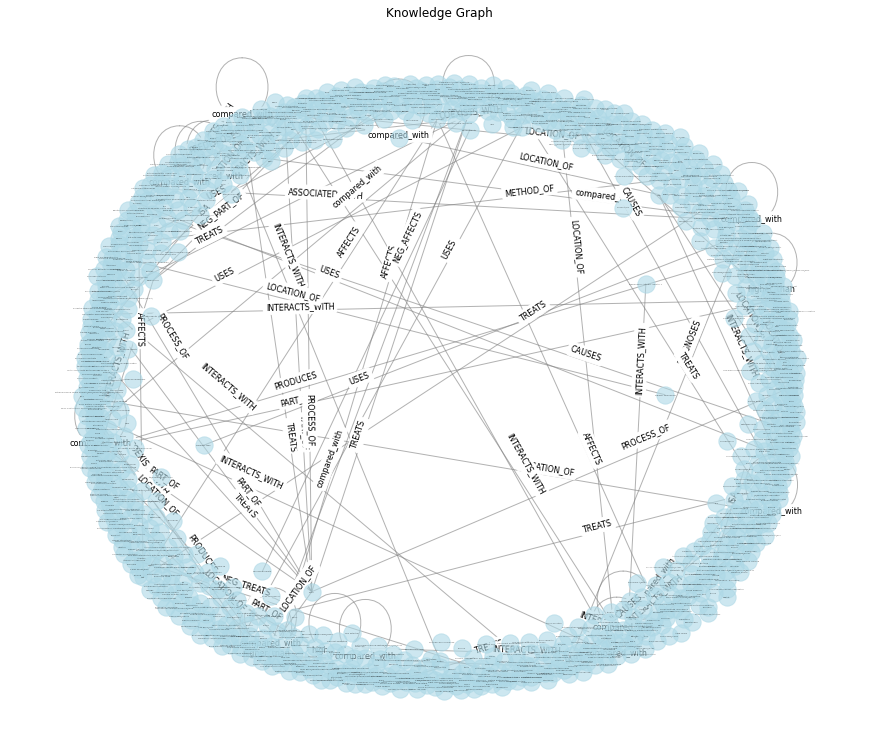

Tempo di esecuzione: -1.6825857162475586 secondi


In [11]:
start_time = time.time()

# Visualize the knowledge graph

# Creiamo un subgraph per la visualizzazione con massimo 200 nodi
nodes_of_interest = random.sample(G.nodes(), min(1000, len(G)))
subgraph = G.subgraph(nodes_of_interest)
pos = nx.spring_layout(subgraph, seed=42, k=0.9)
labels = nx.get_edge_attributes(subgraph, 'label')
plt.figure(figsize=(12, 10))
nx.draw(subgraph, pos, with_labels=True, font_size=2, node_size=300, node_color='lightblue', edge_color='gray', alpha=0.6)
nx.draw_networkx_edge_labels(subgraph, pos, edge_labels=labels, font_size=8, label_pos=0.3, verticalalignment='baseline')
plt.title('Knowledge Graph')
plt.show()
execution_time = end_time - start_time
print(f"Tempo di esecuzione: {execution_time} secondi")

In [13]:
# Number of edges
print(G.number_of_edges())
print(len(G.nodes))

19181195
410821


In [10]:
# save graph object to file
#pickle.dump(G, open('graphnx.pickle', 'wb'))

In [12]:
# load graph object from file
G = pickle.load(open('graphnx.pickle', 'rb'))

# Dataset Claims
 *  Claims: https://huggingface.co/datasets/health_fact/viewer/default/test

In [16]:
df = pd.read_csv('C:\\Users\\Simone\\Documents\\Desktop\\Tesi_Magistrale\\Data\\train.tsv', sep='\t')
df.head()

claim_id                                              claim  \
0    15661  "The money the Clinton Foundation took from fr...   
1     9893    Annual Mammograms May Have More False-Positives   
2    11358  SBRT Offers Prostate Cancer Patients High Canc...   
3    10166  Study: Vaccine for Breast, Ovarian Cancer Has ...   
4    11276  Some appendicitis cases may not require ’emerg...   

       date_published                                        explanation  \
0      April 26, 2015  "Gingrich said the Clinton Foundation ""took m...   
1    October 18, 2011  This article reports on the results of a study...   
2  September 28, 2016  This news release describes five-year outcomes...   
3    November 8, 2011  While the story does many things well, the ove...   
4  September 20, 2010  We really don’t understand why only a handful ...   

                                       fact_checkers  \
0                                      Katie Sanders   
1                                                      
2  Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...   
3                                                      
4                                                      

                                           main_text  \
0  "Hillary Clinton is in the political crosshair...   
1  While the financial costs of screening mammogr...   
2  The news release quotes lead researcher Robert...   
3  The story does discuss costs, but the framing ...   
4  "Although the story didn’t cite the cost of ap...   

                                             sources    label  \
0  https://www.wsj.com/articles/clinton-foundatio...    false   
1                                                     mixture   
2  https://www.healthnewsreview.org/wp-content/up...  mixture   
3  http://clinicaltrials.gov/ct2/results?term=can...     true   
4                                                        true   

                                      subjects  
0  Foreign Policy, PunditFact, Newt Gingrich,   
1               Screening,WebMD,women's health  
2      Association/Society news release,Cancer  
3                  Cancer,WebMD,women's health  
4

In [17]:
print(len(df))
print(df.columns)

9832
Index(['claim_id', 'claim', 'date_published', 'explanation', 'fact_checkers',
       'main_text', 'sources', 'label', 'subjects'],
      dtype='object')


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9832 entries, 0 to 9831
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   claim_id        9832 non-null   object
 1   claim           9824 non-null   object
 2   date_published  7895 non-null   object
 3   explanation     9824 non-null   object
 4   fact_checkers   9821 non-null   object
 5   main_text       9806 non-null   object
 6   sources         9804 non-null   object
 7   label           9805 non-null   object
 8   subjects        9804 non-null   object
dtypes: object(9)
memory usage: 691.4+ KB


## Dimensionality Reduction

In [19]:
df[['claim','subjects','label']]

claim  \
0     "The money the Clinton Foundation took from fr...   
1       Annual Mammograms May Have More False-Positives   
2     SBRT Offers Prostate Cancer Patients High Canc...   
3     Study: Vaccine for Breast, Ovarian Cancer Has ...   
4     Some appendicitis cases may not require ’emerg...   
...                                                 ...   
9827  The Sturgis motorcycle rally in 2020 resulted ...   
9828  AstraZeneca's infant respiratory drug prioriti...   
9829  Testicular cancer deaths double with after 40 ...   
9830   The FDA published “conclusive proof” that the...   
9831  On whether he wrote a provision that allowed A...   

                                         subjects     label  
0     Foreign Policy, PunditFact, Newt Gingrich,      false  
1                  Screening,WebMD,women's health   mixture  
2         Association/Society news release,Cancer   mixture  
3                     Cancer,WebMD,women's health      true  
4                                                      true  
...                                           ...       ...  
9827                   Politics Medical, COVID-19  unproven  
9828                                  Health News      true  
9829                                  Health News      true  
9830                                      Medical     false  
9831              National, Economy, Chris Dodd,      false  

[9832 rows x 3 columns]

In [20]:
# Converti tutti i valori nella colonna 'claim' in stringhe
df['claim'] = df['claim'].astype(str)
df['subjects'] = df['subjects'].astype(str)

In [21]:
kw_uniche = df["subjects"].unique()
print(kw_uniche)
print(len(kw_uniche))

['Foreign Policy, PunditFact, Newt Gingrich, '
 "Screening,WebMD,women's health"
 'Association/Society news release,Cancer' ...
 'Public Health, Florida, Carlos Gimenez, ' 'breast cancer,red wine'
 'National, Economy, Chris Dodd, ']
5812


### GPT

In [22]:
# Definire le parole chiave per l'ambito medico
parole_chiave_mediche = keywords = ['medical', 'biomedical', 'drug', 'health', 'disease', 'coronavirus', 'cancer', 'research', 'hospital', 'virus', 'pharmaceutical', 'clinical', 'therapy', 'treatment','Screening', "women's health", 'Health News', 'platelet-rich plasma', 'Virus Outbreak', 'Public health', 'Addiction treatment', 'Medicaid', 'stem cells', 'Coronavirus', 'flu', 'Health care', 'immunotherapy', "Alzheimer's disease", 'Imaging', 'Muscular dystrophy', 'Marijuana', 'Mental health', 'Heart disease', 'Diabetes', 'acupuncture', 'HIV', 'Abortion', 'National Institutes of Health (NIH)', 'Medical marijuana', 'Civil Rights', 'Gays and Lesbians', 'Sexuality', 'Disabilities', 'Disability', 'Tuberculosis', 'Cardiovascular disease']

# Filtrare le righe che contengono le parole chiave
filtro = df["subjects"].str.contains('|'.join(parole_chiave_mediche), case=False) | df["claim"].str.contains('|'.join(parole_chiave_mediche), case=False)
df = df[filtro]

# Stampare i risultati
df

C:\Users\Simone\AppData\Local\Temp\ipykernel_19012\923370402.py:5: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  filtro = df["subjects"].str.contains('|'.join(parole_chiave_mediche), case=False) | df["claim"].str.contains('|'.join(parole_chiave_mediche), case=False)


claim_id                                              claim  \
1        9893    Annual Mammograms May Have More False-Positives   
2       11358  SBRT Offers Prostate Cancer Patients High Canc...   
3       10166  Study: Vaccine for Breast, Ovarian Cancer Has ...   
5        8713  Britain to reveal trial criteria for coronavir...   
7        2768  U.S. says results encouraging for healthcare d...   
...       ...                                                ...   
9826     8197  Venezuela expands quarantine as number of coro...   
9827    35948  The Sturgis motorcycle rally in 2020 resulted ...   
9828      401  AstraZeneca's infant respiratory drug prioriti...   
9829     2023  Testicular cancer deaths double with after 40 ...   
9830    38118   The FDA published “conclusive proof” that the...   

          date_published                                        explanation  \
1       October 18, 2011  This article reports on the results of a study...   
2     September 28, 2016  This news release describes five-year outcomes...   
3       November 8, 2011  While the story does many things well, the ove...   
5          April 7, 2020  British regulators will this week reveal appro...   
7       January 30, 2014  The Obama administration on Thursday reported ...   
...                  ...                                                ...   
9826      March 16, 2020  Venezuela will implement a nationwide quaranti...   
9827  September 10, 2020  They want to know if mass-events (protests, co...   
9828  September 25, 1995  Britain’s AstraZeneca said a potential medicin...   
9829   February 10, 2011  Men diagnosed with testicular cancer at 40 yea...   
9830   November 22, 2017  FDA Confirms DTaP Vaccine Causes Autism in Nov...   

                                          fact_checkers  \
1                                                         
2     Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...   
3                                                         
5                                        Alistair Smout   
7                                          David Morgan   
...                                                 ...   
9826             Angus Berwick, Luc Cohen, Mariela Nava   
9827                                           Dan Evon   
9828                                                      
9829                                                      
9830                              Rich Buhler & Staff     

                                              main_text  \
1     While the financial costs of screening mammogr...   
2     The news release quotes lead researcher Robert...   
3     The story does discuss costs, but the framing ...   
5     Antibody tests show whether whether people hav...   
7     As part of President Barack Obama’s healthcare...   
...                                                 ...   
9826  The country began a quarantine on Monday in a ...   
9827  In September 2020, social media was abuzz over...   
9828  The “Breakthrough Therapy” and “Prime” designa...   
9829  This was true even when initial treatment and ...   
9830  The FDA hasn’t confirmed a link between DTaP v...   

                                                sources     label  \
1                                                         mixture   
2     https://www.healthnewsreview.org/wp-content/up...   mixture   
3     http://clinicaltrials.gov/ct2/results?term=can...      true   
5                                                            true   
7                                                            true   
...                                                 ...       ...   
9826                                                         true   
9827                                                     unproven   
9828                                                         true   
9829                               http://bit.ly/fGNEw9      true   
9830  https://www.truthorfiction.com/marshall-kamena...     fa

# Preprocessing text

In [23]:
# Converti tutti i valori nella colonna 'claim' in stringhe
df['claim'] = df['claim'].astype(str)
df['subjects'] = df['subjects'].astype(str)

In [24]:
# Trattamento dei valori mancanti
#df['claim'] = df['claim'].fillna('')  # Riempie i valori mancanti con una stringa vuota->potrebbe servire se non si applica la rimozione della punteggiatura

# Converti tutte le frasi in minuscolo
#df['claim'] = df['claim'].str.lower()

# Rimuovi la punteggiatura
#df['claim'] = df['claim'].apply(lambda x: x.translate(str.maketrans("", "", string.punctuation)) if isinstance(x, str) else x)

# Tokenization
#df['claim'] = df['claim'].apply(lambda x: word_tokenize(x) if isinstance(x, str) else x)

# Rimuovi le stop words
stop_words = set(stopwords.words('english'))
#df['claim'] = df['claim'].apply(lambda x: [word for word in x if word not in stop_words] if isinstance(x, list) else x)

# Lemmatizzazione
lemmatizer = WordNetLemmatizer()
#df['claim'] = df['claim'].apply(lambda x: [lemmatizer.lemmatize(word) for word in x] if isinstance(x, list) else x)

# Stemming
#ps = PorterStemmer()
#df['claim'] = df['claim'].apply(lambda x: [ps.stem(word) for word in x])

#Tra le due la letterature consiglia di utilizzare la lemmatizzazione in caso di estrazione

# Estrazione triple REBEL

In [25]:
# Load model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("Babelscape/rebel-large")
model = AutoModelForSeq2SeqLM.from_pretrained("Babelscape/rebel-large")
gen_kwargs = {
    "max_length": 256,
    "length_penalty": 0,
    "num_beams": 3,
    "num_return_sequences": 3,
}

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


In [26]:
def extract_triplets(text):
    triplets = []
    relation, subject, relation, object_ = '', '', '', ''
    text = text.strip()
    current = 'x'
    for token in text.replace("<s>", "").replace("<pad>", "").replace("</s>", "").split():
        if token == "<triplet>":
            current = 't'
            if relation != '':
                triplets.append({'head': subject.strip(), 'type': relation.strip(),'tail': object_.strip()})
                relation = ''
            subject = ''
        elif token == "<subj>":
            current = 's'
            if relation != '':
                triplets.append({'head': subject.strip(), 'type': relation.strip(),'tail': object_.strip()})
            object_ = ''
        elif token == "<obj>":
            current = 'o'
            relation = ''
        else:
            if current == 't':
                subject += ' ' + token
            elif current == 's':
                object_ += ' ' + token
            elif current == 'o':
                relation += ' ' + token
    if subject != '' and relation != '' and object_ != '':
        triplets.append({'head': subject.strip(), 'type': relation.strip(),'tail': object_.strip()})
    return triplets


In [27]:
# Function to apply
def apply_extraction(row):
    # Tokenize the text
    model_inputs = tokenizer(row['claim'], max_length=256, padding=True, truncation=True, return_tensors='pt')



    # Generate
    generated_tokens = model.generate(
        model_inputs["input_ids"].to(model.device),
        attention_mask=model_inputs["attention_mask"].to(model.device),
        **gen_kwargs,
    )

    # Decode
    decoded_preds = tokenizer.batch_decode(generated_tokens, skip_special_tokens=False)

    # Extract triplets
    triplets = []
    for idx, sentence in enumerate(decoded_preds):
        triplets.extend(extract_triplets(sentence))

    return triplets

# Apply the function to each row in the DataFrame
df['triplets'] = df.apply(apply_extraction, axis=1)

# Display the results
for index, row in df.iterrows():
    print(f"Claim : {row['claim']}")
    print(f"Triplets: {row['triplets']}")
    print("-" * 50)

Claim : Annual Mammograms May Have More False-Positives
Triplets: [{'head': 'False-Positives', 'type': 'facet of', 'tail': 'Annual Mammograms'}, {'head': 'False-Positives', 'type': 'part of', 'tail': 'Annual Mammograms'}, {'head': 'False-Positives', 'type': 'subclass of', 'tail': 'False-Positives'}]
--------------------------------------------------
Claim : SBRT Offers Prostate Cancer Patients High Cancer Control and Low Toxicity in Fewer Treatments
Triplets: [{'head': 'SBRT', 'type': 'medical condition treated', 'tail': 'Prostate Cancer'}, {'head': 'SBRT', 'type': 'medical condition treated', 'tail': 'Prostate Cancer'}, {'head': 'Prostate Cancer', 'type': 'drug used for treatment', 'tail': 'SBRT'}, {'head': 'SBRT', 'type': 'facet of', 'tail': 'Prostate Cancer'}]
--------------------------------------------------
Claim : Study: Vaccine for Breast, Ovarian Cancer Has Potential
Triplets: [{'head': 'Ovarian Cancer', 'type': 'has part', 'tail': 'Breast'}, {'head': 'Breast', 'type': 'has ef

In [28]:
df.head()

claim_id                                              claim  \
1     9893    Annual Mammograms May Have More False-Positives   
2    11358  SBRT Offers Prostate Cancer Patients High Canc...   
3    10166  Study: Vaccine for Breast, Ovarian Cancer Has ...   
5     8713  Britain to reveal trial criteria for coronavir...   
7     2768  U.S. says results encouraging for healthcare d...   

       date_published                                        explanation  \
1    October 18, 2011  This article reports on the results of a study...   
2  September 28, 2016  This news release describes five-year outcomes...   
3    November 8, 2011  While the story does many things well, the ove...   
5       April 7, 2020  British regulators will this week reveal appro...   
7    January 30, 2014  The Obama administration on Thursday reported ...   

                                       fact_checkers  \
1                                                      
2  Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...   
3                                                      
5                                     Alistair Smout   
7                                       David Morgan   

                                           main_text  \
1  While the financial costs of screening mammogr...   
2  The news release quotes lead researcher Robert...   
3  The story does discuss costs, but the framing ...   
5  Antibody tests show whether whether people hav...   
7  As part of President Barack Obama’s healthcare...   

                                             sources    label  \
1                                                     mixture   
2  https://www.healthnewsreview.org/wp-content/up...  mixture   
3  http://clinicaltrials.gov/ct2/results?term=can...     true   
5                                                        true   
7                                                        true   

                                  subjects  \
1           Screening,WebMD,women's health   
2  Association/Society news release,Cancer   
3              Cancer,WebMD,women's health   
5                              Health News   
7                              Health News   

                                            triplets  
1  [{'head': 'False-Positives', 'type': 'facet of...  
2  [{'head': 'SBRT', 'type': 'medical condition t...  
3  [{'head': 'Ovarian Cancer', 'type': 'has part'...  
5  [{'head': 'coronavirus', 'type': 'has effect',...  
7  [{'head': 'healthcare delivery reforms', 'type...

In [29]:
df.to_csv('triple_health.csv')

# Matching

Prove precedenti: https://github.com/SimoneFarallo/Thesis/blob/main/Codes/prova_networkx_obo.ipynb

In [12]:
triple = pd.read_csv('C:\\Users\\Simone\\Documents\\Desktop\\Tesi_Magistrale\\triple_health.csv')
triple.head()

Unnamed: 0 claim_id                                              claim  \
0           1     9893    Annual Mammograms May Have More False-Positives   
1           2    11358  SBRT Offers Prostate Cancer Patients High Canc...   
2           3    10166  Study: Vaccine for Breast, Ovarian Cancer Has ...   
3           5     8713  Britain to reveal trial criteria for coronavir...   
4           7     2768  U.S. says results encouraging for healthcare d...   

       date_published                                        explanation  \
0    October 18, 2011  This article reports on the results of a study...   
1  September 28, 2016  This news release describes five-year outcomes...   
2    November 8, 2011  While the story does many things well, the ove...   
3       April 7, 2020  British regulators will this week reveal appro...   
4    January 30, 2014  The Obama administration on Thursday reported ...   

                                       fact_checkers  \
0                                                      
1  Mary Chris Jaklevic,Steven J. Atlas, MD, MPH,K...   
2                                                      
3                                     Alistair Smout   
4                                       David Morgan   

                                           main_text  \
0  While the financial costs of screening mammogr...   
1  The news release quotes lead researcher Robert...   
2  The story does discuss costs, but the framing ...   
3  Antibody tests show whether whether people hav...   
4  As part of President Barack Obama’s healthcare...   

                                             sources    label  \
0                                                     mixture   
1  https://www.healthnewsreview.org/wp-content/up...  mixture   
2  http://clinicaltrials.gov/ct2/results?term=can...     true   
3                                                        true   
4                                                        true   

                                  subjects  \
0           Screening,WebMD,women's health   
1  Association/Society news release,Cancer   
2              Cancer,WebMD,women's health   
3                              Health News   
4                              Health News   

                                            triplets  
0  [{'head': 'False-Positives', 'type': 'facet of...  
1  [{'head': 'SBRT', 'type': 'medical condition t...  
2  [{'head': 'Ovarian Cancer', 'type': 'has part'...  
3  [{'head': 'coronavirus', 'type': 'has effect',...  
4  [{'head': 'healthcare delivery reforms', 'type...

In [15]:
print(triple['triplets'])

0       [{'head': 'False-Positives', 'type': 'facet of...
1       [{'head': 'SBRT', 'type': 'medical condition t...
2       [{'head': 'Ovarian Cancer', 'type': 'has part'...
3       [{'head': 'coronavirus', 'type': 'has effect',...
4       [{'head': 'healthcare delivery reforms', 'type...
                              ...                        
6014    [{'head': 'quarantine', 'type': 'country', 'ta...
6015    [{'head': 'COVID-19 coronavirus', 'type': 'poi...
6016    [{'head': 'AstraZeneca', 'type': 'product or m...
6017    [{'head': 'death double with after 40 diagnosi...
6018    [{'head': 'published “conclusive proof” that t...
Name: triplets, Length: 6019, dtype: object


## Simple Match

In [30]:
graph = G #Prendiamo il grafo costruito precedentemente
subject_label = ""
predicate_label = ""
object_label = ""

# Cerca i nodi corrispondenti ai nomi specificati
subject_node = None
object_node = None

for node, data in graph.nodes(data=True):
    if data.get("name") == subject_label:
        subject_node = node
    elif data.get("name") == object_label:
        object_node = node

# Verifica se le corrispondenze sono state trovate
if subject_node is not None and object_node is not None:
    # Controlla se esiste un arco tra i nodi
    if graph.has_edge(subject_node, object_node, key=predicate_label):
        print(f"Trovata la tripla: {subject_label} {predicate_label} {object_label}")
    else:
        print("Tripla non trovata nel grafo.")
else:
    print("Uno o entrambi i nodi non trovati nel grafo.")

Uno o entrambi i nodi non trovati nel grafo.


Provo ad estrarre e matchare- contemporanamente, utilizzare un subgraph perchè con quello originale ci vogliono più di 4h

In [31]:
# Iterazione attraverso le frasi nel DataFrame
for index, row in df.iterrows():
    # Converte la frase in una stringa (assicurandosi che sia di tipo stringa)
    text = str(row['claim'])

    # Elabora il testo con spaCy
    doc = nlp(text)

    # Inizializza le liste per soggetto, predicato e oggetto
    subjects = []
    predicates = []
    objects = []

    # Itera attraverso i token nella frase
    for token in doc:
        # Aggiungi il token al soggetto se il POS è un sostantivo
        if token.pos_ == "NOUN":
            subjects.append(token.text)

        # Aggiungi il token al predicato se il POS è un verbo
        elif token.pos_ == "VERB":
            predicates.append(token.text)

        # Aggiungi il token all'oggetto se il POS è un sostantivo
        elif token.pos_ == "NOUN":
            objects.append(token.text)

    # Costruisci una rappresentazione della frase
    extracted_triple = {
        "PREDICATE": ' '.join(predicates),
        "SUBJECT_NAME": ' '.join(subjects),
        "OBJECT_NAME": ' '.join(objects)
    }

    # Effettua il matching con il grafo
    for edge in G.edges(data=True):
        graph_triple = {
            "PREDICATE": edge[2]["label"],
            "SUBJECT_NAME": edge[0],
            "OBJECT_NAME": edge[1]
        }

        if extracted_triple == graph_triple:
            print(f"Match trovato per la frase {index + 1}: {text}")
            print(f"Triple estratta: {extracted_triple}")
            print(f"Triple del grafo: {graph_triple}")
            print()

NameError: name 'nlp' is not defined

## Match with Algorithms